# Linear regression

The goal of this exercise is to implement the least mean squares algorithm (LMS) for linear regression seen in the course. 

We start by importing numpy and matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Least mean squares

To generate the data for the exercise, we will use the `scikit-learn` library <https://scikit-learn.org>. It provides a huge selection of already implemented machine learning algorithms for classification, regression or clustering.

If you use Anaconda or Colab, `scikit-learn` should already be installed. Otherwise, install it with `pip` (you may need to relaunch this notebook afterwards):

```
pip install scikit-learn
```

We will use the method `sklearn.datasets.make_regression` to generate the data. The documentation of this method is available at <https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html>.

The following cell imports the method:

In [2]:
from sklearn.datasets import make_regression

We can now generate the data. We start with the simplest case where the inputs have only one dimension. We will generate 100 samples$(x_i, t_i)$ linked by a linear relationship and some noise.

The following code generates the data:

In [3]:
N = 100
X, t = make_regression(n_samples=N, n_features=1, noise=15.0)

`n_samples` is the number of samples generates, `n_features` is the number of input variables and `noise` quantifies how the points deviate from the linear relationship. 

**Q:** Print the shape of the arrays `X` and `t` to better understand what is generated. Visualize the dataset using matplotlib. Vary the value of the `noise` argument in the previous cell and visualize the data again. 

(100, 1)
(100,)


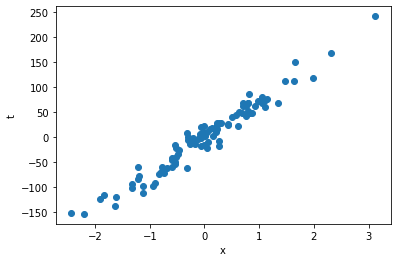

In [4]:
print(X.shape)
print(t.shape)

plt.figure()
plt.scatter(X, t)
plt.xlabel("x")
plt.ylabel("t")
plt.show()

Now is the time to implement the LMS algorithm with numpy.

Remember the LMS algorithm from the course:

* $w=0 \quad;\quad b=0$

* **for** E epochs:

    * $dw=0 \quad;\quad db=0$

    * **for** each sample $(x_i, t_i)$:

        * $y_i = w \, x_i + b$

        * $dw = dw + (t_i - y_i) \, x_i$

        * $db = db + (t_i - y_i)$

    * $\Delta w = \eta \, \frac{1}{N} dw$

    * $\Delta b = \eta \, \frac{1}{N} db$
    
Our linear model $y = w \, x + b$ predicts outputs for an input $x$. The error $t-y$ between the prediction and the data is used to adapt the weight $w$ and the bias $b$ at the end of each epoch.

**Q:** Implement the LMS algorithm and apply it to the generated data. The Python code that you will write is almost a line-by-line translation of the pseudo-code above. You will use a learning rate `eta = 0.1` at first, but you can choose another value later. Start by running a single epoch, as it will be easier to debug it, and then increase the number of epochs to 100 or so. Print the value of the weight and bias at the end.

In [5]:
w = 0
b = 0

eta = 0.1

for epoch in range(100):
    dw = 0
    db = 0.0
    for i in range(N):
        y = w*X[i] + b
        dw += (t[i] - y)*X[i]
        db += (t[i] - y)
    w += eta*dw/N
    b += eta*db/N
    
print(w, b)

[71.82939496] [-0.42363319]


**Q:** Visualize the quality of the fit by superposing the learned model to the data with matplotlib. 

*Tip*: you can get the extreme values of the xaxis with `X.min()` and `X.max()`. To visualize the model, you just need to plot a line between the points `(X.min(), w*X.min()+b)` and `(X.max(), w*X.max()+b)`.

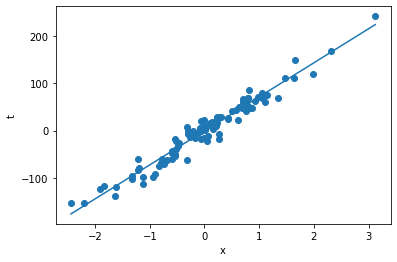

In [6]:
plt.figure()

plt.scatter(X, t)

x_axis = [X.min(), X.max()]
plt.plot(x_axis, w*x_axis + b)

plt.xlabel("x")
plt.ylabel("t")
plt.show()

Another option is to predict a value for all inputs and plot this vector $y$ against the desired values $t$.

**Q:** Make a scatter plot where $t$ is the x-axis and $y = w*X + b$ is the y-axis. How should the points be arranged in the ideal case? Also plot what this ideal relationship should be.

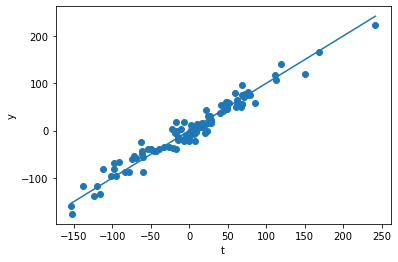

In [7]:
y = w * X + b

plt.figure()

plt.scatter(t, y)

x_axis = [t.min(), t.max()]
plt.plot(x_axis, x_axis)

plt.xlabel("t")
plt.ylabel("y")
plt.show()

**A:** the points $(t, y)$ should be on a line with slope 1 and intercept 0 (i.e. t=y).

A much better method to analyse the result of the learning algorithm is to track the **mean squared error** (mse) after each epoch, i.e. the loss function which we actually want to minimize. The MSE is defined as:

$$\text{mse} = \frac{1}{N} \, \sum_{i=1}^N (t_i - y_i)^2$$

**Q:** Modify your LMS algorithm (either directly or copy it in the next cell) to track the mse after each epoch. After each epoch, append the mse on the training set to a list and plot it at the end. How does the mse evolve? Which value does it get in the end? Why? How many epochs do you actually need?

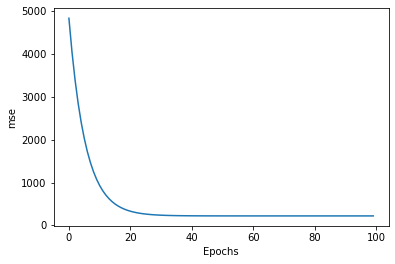

In [8]:
w = 0
b = 0

eta = 0.1

losses = []
for epoch in range(100):
    dw = 0
    db = 0.0
    mse = 0.0
    for i in range(N):
        y = w*X[i] + b
        dw += (t[i] - y)*X[i]
        db += (t[i] - y)
        mse += (t[i] - y)**2
    w += eta*dw/N
    b += eta*db/N
    losses.append(mse/N)
    
plt.figure()
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("mse")
plt.show()

**Answer:** the mse decreases exponentially with the epochs. It never reaches 0 because of the noise in the data (try setting the `noise` argument in the data generator to 0 and check that the mse reaches 0). 30 or 40 epochs seem sufficient to solve the problem, nothing happens afterwards.   

The code that you have written is functional, but extremely slow, as you use for loops in Python. For so little data samples, it does not make a difference, but if you had millions of samples, this would start to be a problem.

The solution is to use optimized implementations of the algorithms, running in C++ or FORTRAN under the hood. We will use here the LMS algorithm provided by `scikit-learn` as you have already installed it and it is very simple to use. Note that one could use tensorflow too, but that would be killing a fly with a sledgehammer.

`scikit-learn` provides a `LinearRegression` object that implements LMS. The documentation is at: <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>.

You simply import it with:

```python
from sklearn.linear_model import LinearRegression
```

You create the object with:

```python
reg = LinearRegression()
```

`reg` is now an object with different methods (`fit()`, `predict()`) that accept any kind of data and performs linear regression. 

To train the model on the data $X, t$, simply use:

```python
reg.fit(X, t)
```

The parameters of the model are obtained with `reg.coef_` for $w$ and `reg.intercept_` for $b$. 

You can predict outputs for new inputs using:

```python
y = reg.predict(X)
```

**Q:** Apply linear regression on the data using `scikit-learn`. Check the model parameters after learning and compare them to what you obtained previously. Make a plot comparing the predictions with the data.

[71.83579731] -0.4249001654178497


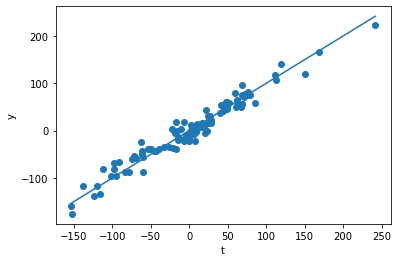

In [9]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, t)

print(reg.coef_, reg.intercept_)

y = reg.predict(X)

plt.figure()
plt.scatter(t, y)
x_axis = [t.min(), t.max()]
plt.plot(x_axis, x_axis)
plt.xlabel("t")
plt.ylabel("y")
plt.show()

**A:** for such a simple problem, it does not make a difference with your previous implementation, but it is very simple to use and optimized.

## Multiple linear regression

Let's now try multiple linear regression (MLR), where the output depends on more than one input variable:

$$
\begin{cases}
y_1 = w_1 \, x_1 + w_2 \, x_2 + b_1\\
\\
y_2 = w_3 \, x_1 + w_3 \, x_2 + b_2\\
\end{cases}
$$

The Boston Housing Dataset consists of price of houses in various places in Boston. Alongside with price, the dataset also provide information such as the crime rate (CRIM), the proportion of non-retail business acres per town (INDUS), the proportion of owner-occupied units built prior to 1940 (AGE) and several other attributes. It is available here : <https://archive.ics.uci.edu/ml/machine-learning-databases/housing>.

The Boston dataset can be directly downloaded from scikit-learn:

In [10]:
from sklearn.datasets import load_boston

boston = load_boston()

X = boston.data
t = boston.target

print(X.shape)
print(t.shape)

(506, 13)
(506,)


There are 506 samples with 13 inputs and one output (the price). The following cell decribes what the features are:

In [11]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The following cell allows to visualize how each variable influences the price individually:

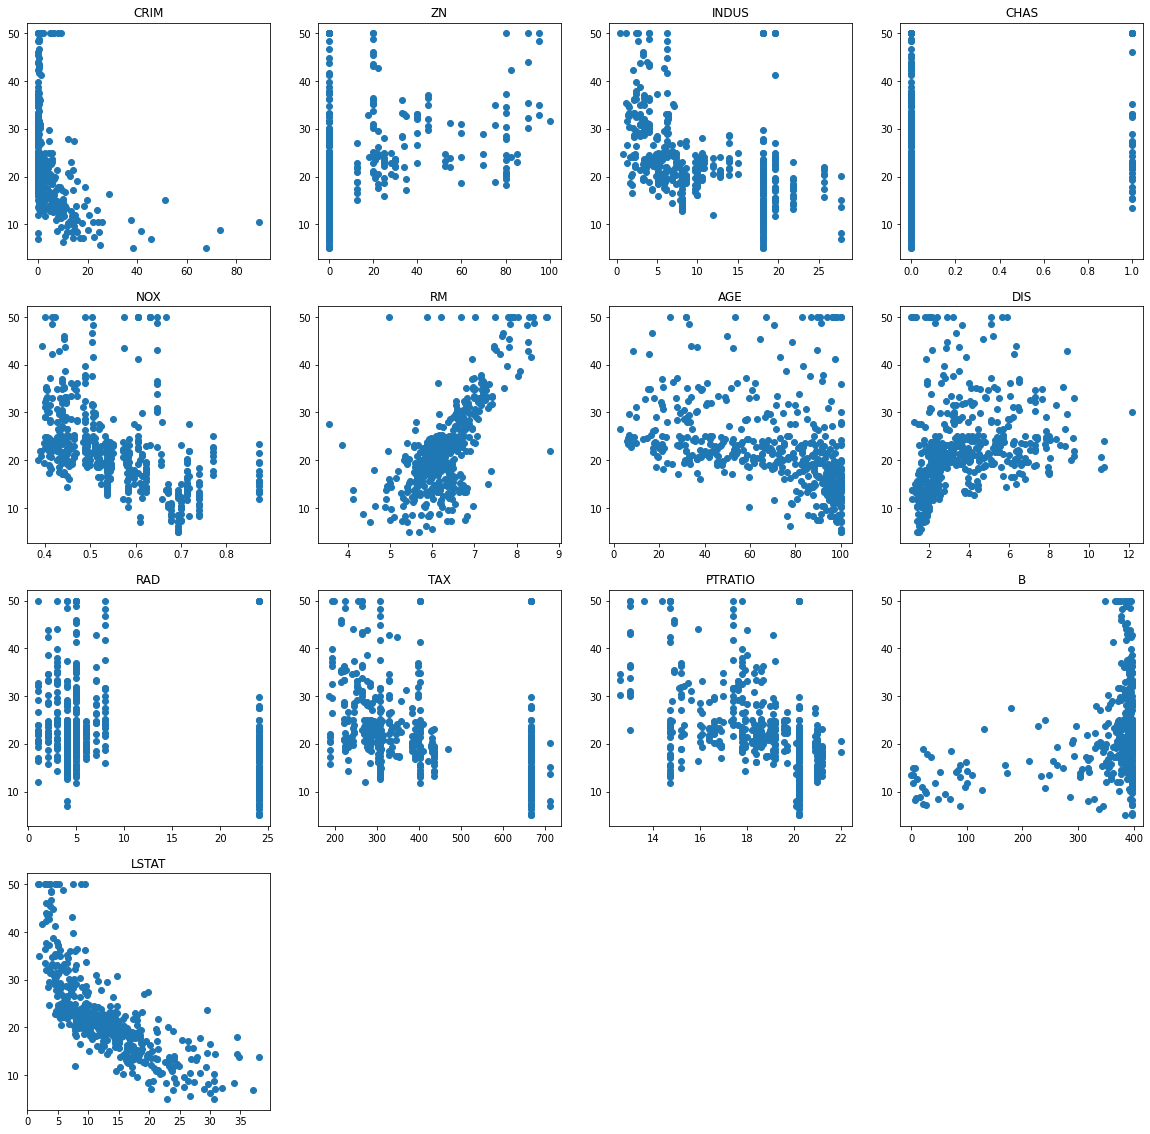

In [12]:
plt.figure(figsize=(20, 20))

for i in range(13):
    plt.subplot(4, 4 , i+1)
    plt.scatter(X[:, i], t)
    plt.title(boston.feature_names[i])
plt.show()

**Q:** Apply MLR on the Boston data. Print the mse and visualize the prediction $y$ against the true value $t$ for each sample as before. Does it work?

You will also plot the weights of the model (`reg.coef_`) and conclude on the relative importance of the different features.  

MSE: 21.894831181729202


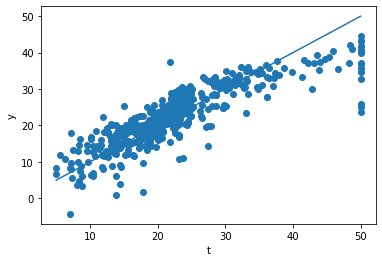

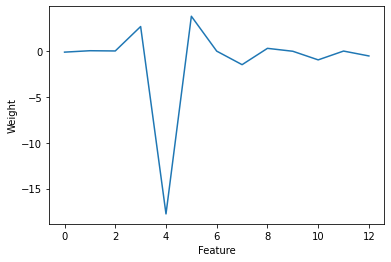

In [13]:
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X, t)

y = reg.predict(X)

mse = mean_squared_error(y, t)
print("MSE:", mse)

plt.figure()
plt.scatter(t, y)
plt.plot([t.min(), t.max()], [t.min(), t.max()])
plt.xlabel("t")
plt.ylabel("y")

plt.figure()
plt.plot(reg.coef_)
plt.xlabel("Feature")
plt.ylabel("Weight")
plt.show()

Feature 4 (NOX) got a very strong weight, although it is not a good predictor of the price. The main reason is that the features are not **normalized**: NOX varies between 0.0 an 1.0, while B varies between 0 and 400. The weight on B (Feature 11) does not need to be very high to influence the price prediction.

A good practice in machine learning is to **normalize** the inputs, i.e. to make sure that the samples have a mean of 0 and a standard deviation of 1. `scikit-learn` provides a method named `scale` that does it automatically:

In [14]:
from sklearn.preprocessing import scale
X_scaled = scale(X)

**Q:** Apply MLR again on `X_scaled`, print the mse and visualize the weights. What has changed?

mse: 21.894831181729202


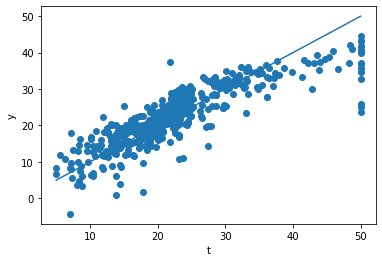

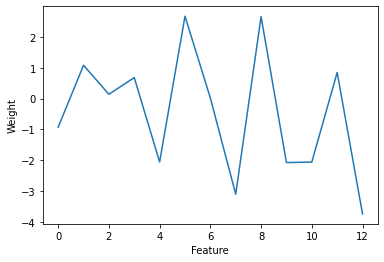

In [15]:
reg = LinearRegression()

reg.fit(X_scaled, t)

y = reg.predict(X_scaled)

mse = mean_squared_error(y, t)
print("mse:", mse)

plt.figure()
plt.scatter(t, y)
plt.plot([t.min(), t.max()], [t.min(), t.max()])
plt.xlabel("t")
plt.ylabel("y")

plt.figure()
plt.plot(reg.coef_)
plt.xlabel("Feature")
plt.ylabel("Weight")
plt.show()

**Answer:** the mse does not change (it may in more complex problems), but the weights are more interpretable. Now strong weights in absolute value mean that the features are very predictive of the price.

Now is time to investigate **regularization**:
1. MLR with L2 regularization is called **Ridge regression**
2. MLR with L1 regularization is called **Lasso regression** 

Fortunately, `scikit-learn` provides these methods with a similar interface to `LinearRegression`. The `Ridge` and `Lasso` objects take an additional argument `alpha` which represents the regularization parameter:

```python
reg = Ridge(alpha=0.1)
reg = Lasso(alpha=0.1)
```

In [16]:
from sklearn.linear_model import Ridge, Lasso

**Q:** Apply Ridge and Lasso regression on the scaled data, vary the regularization parameter to understand its function and comment on the results. In particular, increase the regularization parameter for LASSO and identify the features which are the most predictive of the price. Does it make sense?  

21.967591187738435
[-0.85905074  0.95497477 -0.04132656  0.70777968 -1.81261091  2.74234394
 -0.03238278 -2.85675627  2.0978234  -1.56539453 -1.98775121  0.84470905
 -3.62394181]


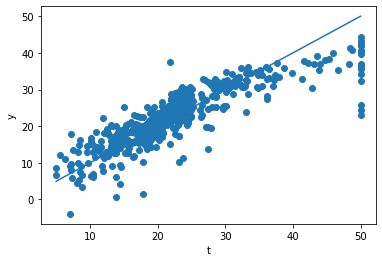

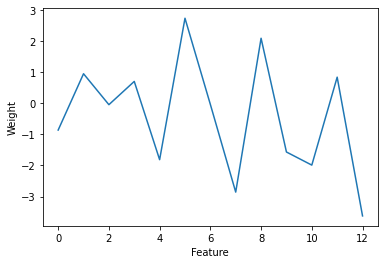

In [17]:
reg = Ridge(alpha=10.0)

reg.fit(X_scaled, t)
y = reg.predict(X_scaled)
mse = mean_squared_error(y, t)
print(mse)

print(reg.coef_)

plt.figure()
plt.scatter(t, y)
plt.plot([t.min(), t.max()], [t.min(), t.max()])
plt.xlabel("t")
plt.ylabel("y")

plt.figure()
plt.plot(reg.coef_)
plt.xlabel("Feature")
plt.ylabel("Weight")
plt.show()

28.464652626660328
[-0.          0.         -0.          0.         -0.          2.7133553
 -0.         -0.         -0.         -0.         -1.3435488   0.18095664
 -3.54338107]


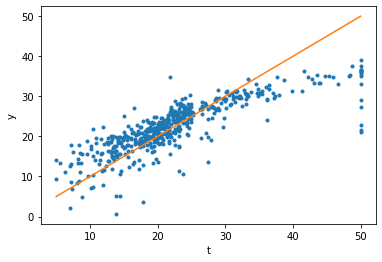

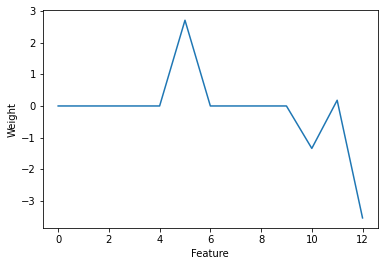

In [18]:
reg = Lasso(alpha=1.0)

reg.fit(X_scaled, t)
y = reg.predict(X_scaled)
mse = mean_squared_error(y, t)
print(mse)

print(reg.coef_)

plt.figure()
plt.plot(t, y, '.')
plt.plot([t.min(), t.max()], [t.min(), t.max()])
plt.xlabel("t")
plt.ylabel("y")

plt.figure()
plt.plot(reg.coef_)
plt.xlabel("Feature")
plt.ylabel("Weight")
plt.show()

**A:** Ridge regression does not have a big effect for this data. By increasing the regularization parameter in Lasso regression, the MSE worsens slightly, but the number of non-zero weights becomes very small. With `alpha=1.0`, there are only 4 non-zero parameters: the corresponding features are the most predictive of the prices. You can identify them with:

In [19]:
print(boston.feature_names[reg.coef_ != 0.0])

['RM' 'PTRATIO' 'B' 'LSTAT']


- RM       average number of rooms per dwelling
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population

You are now a data scientist!